## Create 2D images for LPR

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy     as np
import pandas    as pd
from   scipy     import stats
import matplotlib.pyplot as plt

import cnn.data_xyimg as xyimg


## Test

In [9]:
path = '/scratch/next/data/NEXT100/pressure_topology/'
xyimg.tests(path)

processing  13bar ,  0nubb
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
Output file :  /scratch/next/data/NEXT100/pressure_topology/prod/xyimg_levels_13bar_8_0nubb
processing  13bar ,  1eroi
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_1eroi.h5
Output file :  /scratch/next/data/NEXT100/pressure_topology/prod/xyimg_levels_13bar_8_1eroi
input file 1  /scratch/next/data/NEXT100/pressure_topology/prod/xyimg_levels_13bar_8_0nubb.npz
input file 2  /scratch/next/data/NEXT100/pressure_topology/prod/xyimg_levels_13bar_8_1eroi.npz
Output file :  /scratch/next/data/NEXT100/pressure_topology/prod/xyimg_levels_13bar_8
processing  5bar ,  0nubb
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_0nubb.h5
Output file :  /scratch/next/data/NEXT100/pressure_topology/prod/xyimg_levels_5bar_8_0nubb
processing  5bar ,  1eroi
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel

True

In [12]:
import cnn.dataprod_xyimg as prod

In [11]:
pressure = '1bar'
sample   = '0nubb'
ifilename1 = xyimg.path + xyimg.voxel_filename(pressure, sample)
xyimg.test_run_xyimg_z(ifilename1, 'test_sample1')

Input voxel file: /Users/hernando/work/investigacion/NEXT/data/NEXT100/pressure_topology/voxel_dataset_1bar_0nubb.h5


FileNotFoundError: File /Users/hernando/work/investigacion/NEXT/data/NEXT100/pressure_topology/voxel_dataset_1bar_0nubb.h5 does not exist

In [63]:
xi[0].shape

(8, 8, 4)

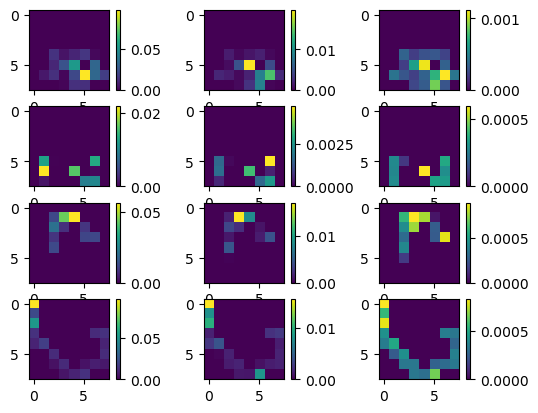

In [64]:
plt.figure()
for i in range(3):
    for j in range(4):
        plt.subplot(4, 3, 3*j + i + 1)
        plt.imshow(xi[i][:, :, j])
        plt.colorbar();

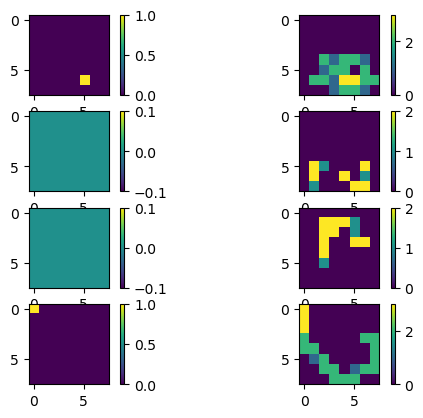

In [65]:
plt.figure()
for i in range(2):
    for j in range(4):
        plt.subplot(4, 2, 2*j + i + 1)
        plt.imshow(zi[i][:, :, j])
        plt.colorbar();

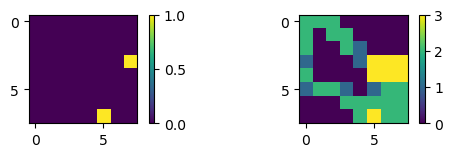

In [37]:
plt.figure()
for i in range(1):
    for j in range(2):
        plt.subplot(3, 2, 2*i + j + 1)
        plt.imshow(zi[2*i + j])
        plt.colorbar();

## Code

## Run several 


In [6]:
def production(pressures, samples, bins, coors, labels, nevents = -1):
    for pressure in pressures:
        for sample in samples:
            print('processing ', pressure, ', ', sample)
            ifile = xyimg.path + xyimg.voxel_filename(pressure, sample)
            ofile = 'xyimg_'+str(pressure)+'_'+str(sample)+'_'+str(bins[0])
            xyimg.run(ifile, ofile, bins = bins, coors = coors, labels = labels, nevents = nevents)
    return

In [41]:
pressures = ["13bar","5bar"]
samples   = ['0nubb', '1eroi']
bins      = (8, 8)
coors     = ('x', 'y')
labels    = ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
nevents   = -1

In [ ]:
production(pressures, samples, bins, coors, labels, nevents)

In [57]:
def mix(pressures, widths):
    for pressure in pressures:
        for width in widths:
            file1 = 'xyimg_'+str(pressure)+'_0nubb_'+str(width)+'.npz'
            file2 = 'xyimg_'+str(pressure)+'_1eroi_'+str(width)+'.npz'
            ofile = 'xyimg_'+str(pressure)+'_'+str(width)
            xyimg.mix_godata(xyimg.path + file1, xyimg.path + file2, ofile)

In [62]:
pressures = ["1bar","2bar"]
widths    = [16, 32]

In [63]:
mix(pressures, widths)

x labels  ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
z labels  ['ext', 'seg']
image shapes  (15774, 7, 16, 16)
Output file :  xyimg_1bar_16
x labels  ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
z labels  ['ext', 'seg']
image shapes  (15774, 7, 32, 32)
Output file :  xyimg_1bar_32
x labels  ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
z labels  ['ext', 'seg']
image shapes  (13549, 7, 16, 16)
Output file :  xyimg_2bar_16
x labels  ['esum', 'ecount', 'emax', 'emean', 'estd', 'zmean', 'zstd']
z labels  ['ext', 'seg']
image shapes  (13549, 7, 32, 32)
Output file :  xyimg_2bar_32


## Test

In [47]:
xyimg.tests()

Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_0nubb.h5
Output file :  test_0nubb
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_1eroi.h5
Input voxel file: /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_13bar_1eroi.h5
Output file :  test_1eroi
x labels  ['esum', 'ecount', 'emean', 'emax', 'estd']
z labels  ['ext', 'seg']
shape x   (10, 5, 8, 8) (10, 5, 8, 8)
shape y   (10, 1) (10, 1)
shape z   (10, 2, 8, 8) (10, 2, 8, 8)
shape id  (10, 2) (10, 2)
image shapes  (10, 5, 8, 8)
shape xs   20 (5, 8, 8)
shape ys   20 (1,)
shape zs   20 (5, 8, 8)
shape ids  20 (2,)
Output file :  test_13bar
Passed all tests!


True

## Plots

[1]


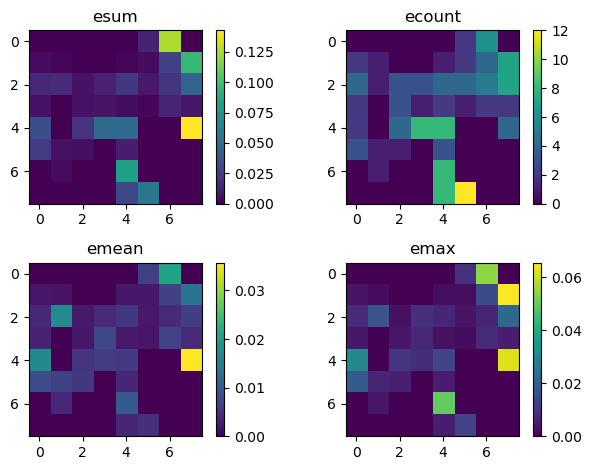

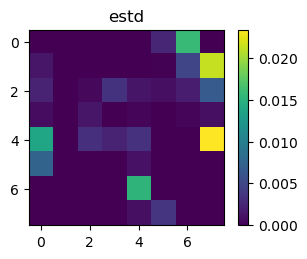

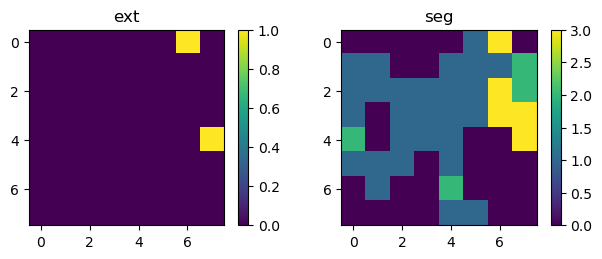

<Figure size 640x480 with 0 Axes>

In [52]:
odata = xyimg.load('test_13bar.npz')
ievt = 2
print(odata.y[ievt])
xyimg.plot_imgs(odata.xdic, ievt)
xyimg.plot_imgs(odata.zdic, ievt)

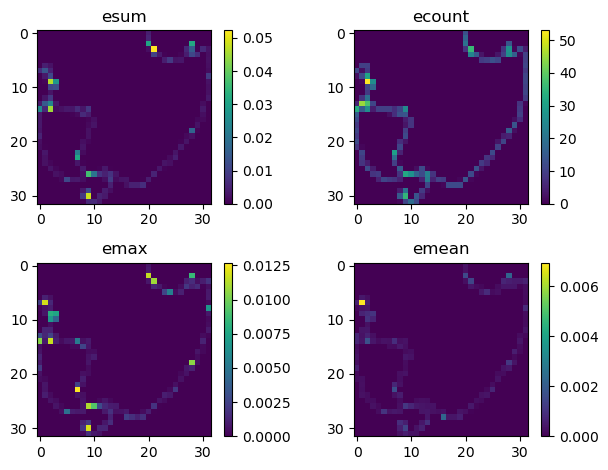

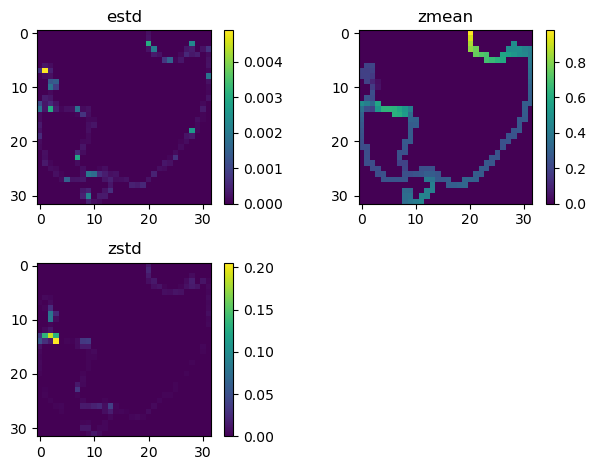

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

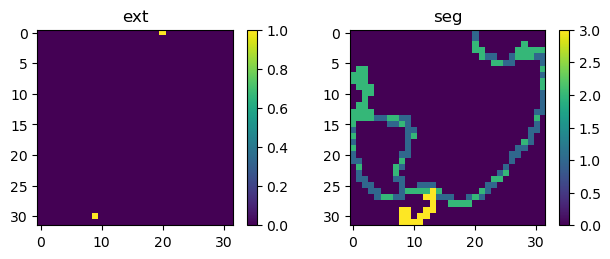

<Figure size 640x480 with 0 Axes>

In [38]:
odata = xyimg.load('xyimg_1bar_1eroi_32.npz')
ievt = 1
xyimg.plot_imgs(odata.xdic, ievt)
xyimg.plot_imgs(odata.zdic, ievt)